In [1]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import mplfinance as mpl

In [2]:
api_url = "https://api.coincap.io/v2/assets"
#this funtion is for crypto data class (for individual currency)
def fetch_crypto_details(crypto_name):
    crypto_url = f"{api_url}/{crypto_name}"
    response = requests.get(crypto_url)
    if response.status_code == 200:
        data = response.json()['data']
        cryptoDic = {
            'id': data['id'],
            'symbol': data['symbol'],
            'priceUsd': data['priceUsd'],
            'volumeUsd24Hr': data['volumeUsd24Hr'],
            'marketCapUsd': data['marketCapUsd']
        }  
        cryptoDF = pd.DataFrame([cryptoDic])
        return cryptoDF
    else:
        return None
    
#this function is to fetch historical data for individual currency
def historical_data(crypto_name):
    history_url = f"{api_url}/{crypto_name}/history?interval=d1"
    history_response = requests.get(history_url)
    if history_response.status_code == 200:
        history_data = history_response.json()['data']
        history_dic = {
            'priceUsd': [item['priceUsd'] for item in history_data],
            'date': [item['date'] for item in history_data]
        }
        historyDF = pd.DataFrame(history_dic)
        return historyDF
    else:
        return None
            
#this funtion deals with individual currency
class CryptoData: 
    def __init__(self, crypto_name):
        self.crypto_name = crypto_name
        self.cryptoDF = fetch_crypto_details(crypto_name)
        self.cryptoDF = self.cryptoDF.fillna(self.cryptoDF.mean(numeric_only=True))
        self.historyDF = historical_data(crypto_name)
        
    def load_from_csv(self):
        self.cryptoDF = pd.read_csv('group9_crypto')
        self.historyDF = pd.read_csv('group9_history')
        
    #to output the current price of any given crypto  
    def current_crypto_price(self):
        if self.cryptoDF is not None:
            crypto_id = self.cryptoDF['id'].iloc[0]
            if crypto_id == "bitcoin":
                crypto_id = "Bitcoin(BTC)"
            elif crypto_id == "ethereum":
                crypto_id = "Ethereum(ETH)"
            elif crypto_id == "xrp":
                crypto_id = "Ripple(XRP)"
            price_usd = float(self.cryptoDF['priceUsd'].iloc[0])
            print(f"{crypto_id} Current Price: {price_usd:.2f} with Market Cap: {float(self.cryptoDF['marketCapUsd'].iloc[0]):.2f} and 24HrVolume: {float(self.cryptoDF['volumeUsd24Hr'].iloc[0]):.2f}")
        else:
            print(f"Could not fetch data for {self.crypto_name}")
            
    #to calculate log returns        
    def calculateLog(self):
        price = self.historyDF['priceUsd'].apply(float)
        log = np.log(price/price.shift(1))
        self.historyDF['log_returns'] = log
        self.historyDF['log_returns'].fillna(0.0,inplace=True)
        return self.historyDF['log_returns']
    
    def stats(self):
        if not self.historyDF['log_returns'].isnull().all():
            arr=np.array(self.historyDF['log_returns'])
            print("Mean: ",np.mean(arr))
            print("Standard Deviation: ",np.std(arr))
            print("Median: ",np.median(arr))
        else:
            print("No Log Returns to Calculate Stats")
    
    def save_to_csv(self):
        self.cryptoDF.to_csv('group9_crypto')
        self.historyDF.to_csv('group9_history')
        
    def highest_price(self):
        if not self.historyDF.empty:  
            self.historyDF['priceUsd'] = pd.to_numeric(self.historyDF['priceUsd'], errors = 'coerce')

            max_price_row = self.historyDF.loc[self.historyDF['priceUsd'].idxmax()]
            maxCryptoPrice = max_price_row['priceUsd']
            date_of_max_price = max_price_row['date']
            date_of_max_price = date_of_max_price.split('T')[0]#to split after T and time
            crypto_name_display = { "bitcoin": "Bitcoin(BTC)", "ethereum" : "Ethereum(ETH)", "xrp" : "Ripple(XRP)" }.get(self.crypto_name, self.crypto_name)

            print(f"Highest Price of {crypto_name_display} was {maxCryptoPrice:.2f} on {date_of_max_price}")
        else:
            print(f"Could not fetch data for {self.crypto_name}")
    
    def correlation_matrix(self, other_crypto):
        # Calculate correlation matrix between returns of two cryptocurrencies
        correlations = np.corrcoef(
            np.array(self.historyDF['log_returns']),
            np.array(other_crypto.calculateLog())
        )
        print("Correlation Matrix:\n", correlations)
        return correlations


PRESS 1 TO RUN NEW PROGRAM
PRESS 2 TO LOAD FROM FILE
INPUT CHOICE: 1
PRESS 1 TO CALCULATE CURRENT PRICE
PRESS 2 TO CALCULATE HIGHEST PRICE
PRESS 3 TO GET CO-RELATION MATRIX
PRESS 4 TO GET STATS
PRESS 5 TO GET GRAPHS AND CHARTS
PRESS 6 TO EXIT
INPUT CHOICE: 1
INPUT 1 FOR BTC
INPUT 2 FOR ETH
INPUT 3 FOR XRP
INPUT CHOICE: 1
Bitcoin(BTC) Current Price: 44109.89 with Market Cap: 864406792852.62 and 24HrVolume: 18997482521.32
PRESS 1 TO RUN NEW PROGRAM
PRESS 2 TO LOAD FROM FILE
INPUT CHOICE: 1
PRESS 1 TO CALCULATE CURRENT PRICE
PRESS 2 TO CALCULATE HIGHEST PRICE
PRESS 3 TO GET CO-RELATION MATRIX
PRESS 4 TO GET STATS
PRESS 5 TO GET GRAPHS AND CHARTS
PRESS 6 TO EXIT
INPUT CHOICE: 2
INPUT 1 FOR BTC
INPUT 2 FOR ETH
INPUT 3 FOR XRP
INPUT CHOICE: 1
Highest Price of Bitcoin(BTC) was 46672.60 on 2024-01-09
PRESS 1 TO RUN NEW PROGRAM
PRESS 2 TO LOAD FROM FILE
INPUT CHOICE: 1
PRESS 1 TO CALCULATE CURRENT PRICE
PRESS 2 TO CALCULATE HIGHEST PRICE
PRESS 3 TO GET CO-RELATION MATRIX
PRESS 4 TO GET STATS
PR

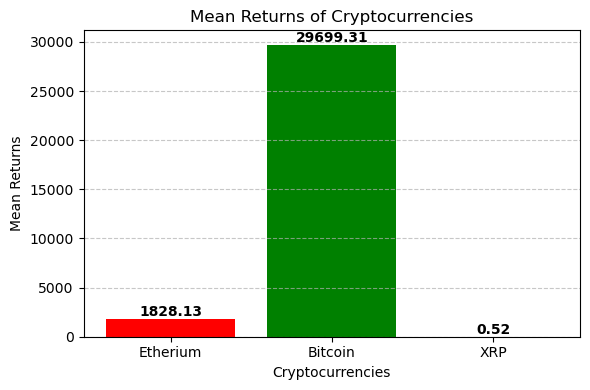

PRESS 1 TO RUN NEW PROGRAM
PRESS 2 TO LOAD FROM FILE
INPUT CHOICE: 1
PRESS 1 TO CALCULATE CURRENT PRICE
PRESS 2 TO CALCULATE HIGHEST PRICE
PRESS 3 TO GET CO-RELATION MATRIX
PRESS 4 TO GET STATS
PRESS 5 TO GET GRAPHS AND CHARTS
PRESS 6 TO EXIT
INPUT CHOICE: 5
PRESS 1 FOR LINE CHART
PRESS 2 FOR BAR GRAPH
PRESS 3 FOR 3D CHARTS
PRESS 4 FOR SCATTER AND STEP CHARTS
PRESS 5 FOR CANDLE CHARTS
INPUT CHOICE: 5
INPUT 1 FOR BTC
INPUT 2 FOR ETH
INPUT 3 FOR XRP
INPUT CHOICE: 2


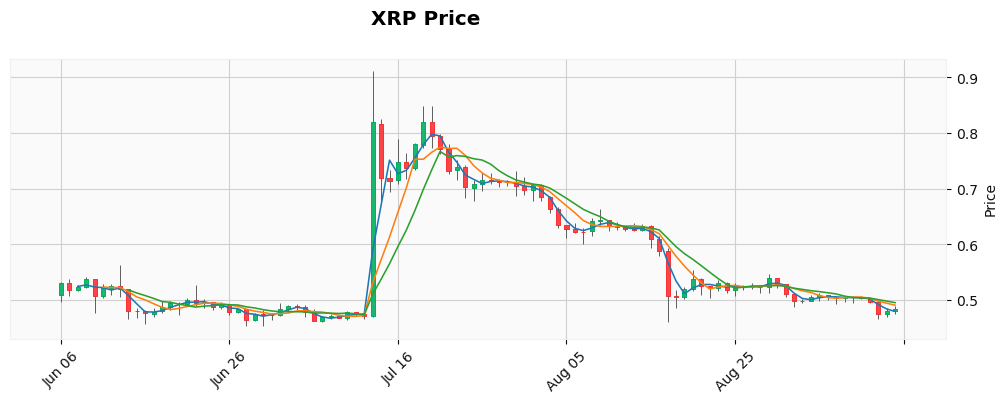

<Figure size 640x480 with 0 Axes>

None
PRESS 1 TO RUN NEW PROGRAM
PRESS 2 TO LOAD FROM FILE


In [ ]:
#main
eth = CryptoData("ethereum")
btc = CryptoData("bitcoin")
xrp = CryptoData("xrp")
flag = bool(True)
while flag:
    print("PRESS 1 TO RUN NEW PROGRAM\nPRESS 2 TO LOAD FROM FILE")
    main_menu =  int(input("INPUT CHOICE: "))
    if main_menu == 2:
        btc.load_from_csv()
        eth.load_from_csv()
        xrp.load_from_csv()
        print("Data has been loaded Successfully!")
    elif main_menu == 1:
        print("PRESS 1 TO CALCULATE CURRENT PRICE")
        print("PRESS 2 TO CALCULATE HIGHEST PRICE")
        print("PRESS 3 TO GET CO-RELATION MATRIX")
        print("PRESS 4 TO GET STATS")
        print("PRESS 5 TO GET GRAPHS AND CHARTS")
        print("PRESS 6 TO EXIT")
        sub_menu =  int(input("INPUT CHOICE: "))
        if sub_menu == 1:
            crypto = int(input("INPUT 1 FOR BTC\nINPUT 2 FOR ETH\nINPUT 3 FOR XRP\nINPUT CHOICE: "))
            if crypto == 1:
                btc.current_crypto_price()
            elif crypto == 2:
                eth.current_crypto_price()
            elif crypto == 3:
                xrp.current_crypto_price()
            else:
                print("INCORRECT INPUT")
                    
        elif sub_menu == 2:
            crypto = int(input("INPUT 1 FOR BTC\nINPUT 2 FOR ETH\nINPUT 3 FOR XRP\nINPUT CHOICE: "))
            if crypto == 1:
                btc.highest_price()
            elif crypto == 2:
                eth.highest_price()
            elif crypto == 3:
                xrp.highest_price()
            else:
                print("INCORRECT INPUT")
                
        elif sub_menu == 3:
            crypto = int(input("INPUT 1 FOR BTC/ETH \nINPUT 2 FOR BTC\XRP \nINPUT 3 FOR XRP/ETH\nINPUT CHOICE: "))
            if crypto == 1:
                btc.calculateLog()
                btc.correlation_matrix(eth)
            elif crypto == 2:
                eth.calculateLog()
                eth.correlation_matrix(xrp)
            elif crypto == 3:
                xrp.calculateLog()
                xrp.correlation_matrix(eth)
            else:
                print("INCORRECT INPUT")
                
        elif sub_menu == 4:
            crypto = int(input("INPUT 1 FOR BTC\nINPUT 2 FOR ETH\nINPUT 3 FOR XRP\nINPUT CHOICE: "))
            if crypto == 1:
                btc.calculateLog()
                btc.stats()
            elif crypto == 2:
                eth.calculateLog()
                eth.stats()
            elif crypto == 3:
                xrp.calculateLog()
                xrp.stats()
            else:
                print("INCORRECT INPUT")
                
        elif sub_menu == 5:
            E=historical_data("ethereum")
            # convert data type object to is '%Y-%m-%d %H:%M:%S'
            E["date"] = pd.to_datetime(E["date"], format='%Y-%m-%d %H:%M:%S')
            # Convert priceusd from object to float64 using astype()
            E["priceUsd"] = E["priceUsd"].astype('float64')

            B=historical_data("bitcoin")
            # convert data type object to is '%Y-%m-%d %H:%M:%S'
            B["date"] = pd.to_datetime(B["date"], format='%Y-%m-%d %H:%M:%S')
            # Convert priceusd from object to float64 using astype()
            B["priceUsd"] = B["priceUsd"].astype('float64')

            X=historical_data("xrp")
            # convert data type object to is '%Y-%m-%d %H:%M:%S'
            X["date"] = pd.to_datetime(X["date"], format='%Y-%m-%d %H:%M:%S')
            # Convert priceusd from object to float64 using astype()
            X["priceUsd"] = X["priceUsd"].astype('float64')   
            print("PRESS 1 FOR LINE CHART\nPRESS 2 FOR BAR GRAPH\nPRESS 3 FOR 3D CHARTS\nPRESS 4 FOR SCATTER AND STEP CHARTS\nPRESS 5 FOR CANDLE CHARTS")
            chart = int(input("INPUT CHOICE: "))
            if chart == 1:
                #line charts
                def myLineCharts(E,title,colr):
                    fig,axes=plt.subplots(1,1,figsize=(13,4))

                    axes.plot(E['date'], E['priceUsd'],colr)
                    axes.set_title(f'Price vs Date ({title})')
                    axes.set_xlabel('Date')
                    axes.set_ylabel('Price (USD)')
                    axes.grid(True)
                    axes.tick_params(axis='x', rotation=45)
                    fig.tight_layout()
    
                    plt.show()
                            
                crypto = int(input("INPUT 1 FOR BTC\nINPUT 2 FOR ETH\nINPUT 3 FOR XRP\nINPUT CHOICE: "))
                if crypto == 1:
                    myLineCharts(B,"Bitcoin(BTC)",'g')
                elif crypto == 2:
                    myLineCharts(E,"Ethereum(ETH)",'r')
                elif crypto == 3:
                    myLineCharts(X,"Ripple(XRP)",'b')
                else:
                    print("INCORRECT INPUT")
                        
            elif chart == 2:
                def myBarChart(E,B,X):
                    mean_return_E = E["priceUsd"].mean()
                    mean_return_B = B["priceUsd"].mean()
                    mean_return_X = X["priceUsd"].mean()

                    mean_returns = [mean_return_E, mean_return_B, mean_return_X]
                    cryptocurrencies = ['Etherium', 'Bitcoin', 'XRP']
                    plt.figure(figsize=(6, 4)) 
                    bars = plt.bar(cryptocurrencies, mean_returns, color=['red', 'green', 'blue'])
                            # Adding labels to the bars
                    for bar, ret in zip(bars, mean_returns):  # Changed 'bar' to 'bars' for iteration
                        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05,
                            f'{ret:.2f}', ha='center', va='bottom', color='black', fontweight='bold')
                    plt.xlabel('Cryptocurrencies')
                    plt.ylabel('Mean Returns')
                    plt.title('Mean Returns of Cryptocurrencies')
                    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
                    plt.tight_layout()
                    plt.show()

                myBarChart(E,B,X)
                        
            elif chart == 3:
                #3d chart
                def my3DCharts(E,B,X):
                    fig=plt.figure(figsize=(14,4))

                    ax=fig.add_subplot(1,3,1,projection='3d')
                    Z= X["priceUsd"]
                    Z2=Z.values.reshape(-1, 1)
                    p=ax.plot_wireframe(E["priceUsd"],B["priceUsd"],Z2,rstride=4,cstride=4,linewidth=3,alpha=0.5)
                    ax.set_xlabel('Etherim')
                    ax.set_ylabel('Bitcoin')
                    ax.set_zlabel('XRP')
                    ax.set_xlim([E["priceUsd"].min(),E["priceUsd"].max()])  
                    ax.set_ylim([B["priceUsd"].min(),B["priceUsd"].max()])  
                    ax.set_zlim([X["priceUsd"].min(),X["priceUsd"].max()])  
                    fig.colorbar(p,ax=ax,shrink=0.7,location='left',pad=0.0)
                    fig.tight_layout()

                    ax=fig.add_subplot(1,3,2,projection='3d')
                    Z= X["priceUsd"]
                    Z2=Z.values.reshape(-1, 1)
                    p=ax.plot_surface(E["priceUsd"],B["priceUsd"],Z2,rstride=4,cstride=4,cmap=matplotlib.cm.coolwarm,linewidth=3,alpha=0.8)
                    ax.set_xlabel('Etherim')
                    ax.set_ylabel('Bitcoin')
                    ax.set_zlabel('XRP')
                    ax.set_xlim([E["priceUsd"].min(),E["priceUsd"].max()])  
                    ax.set_ylim([B["priceUsd"].min(),B["priceUsd"].max()])  
                    ax.set_zlim([X["priceUsd"].min(),X["priceUsd"].max()])  
                    fig.colorbar(p,ax=ax,shrink=0.6,location='left',pad=0.0)
                    fig.tight_layout()

                    ax=fig.add_subplot(1,3,3,projection='3d')
                    Z= X["priceUsd"]
                    Z2=Z.values.reshape(-1, 1)
                    ax.plot_surface(E["priceUsd"],B["priceUsd"],Z2,rstride=4,cstride=4,cmap=matplotlib.cm.RdBu,linewidth=3,alpha=0.8)
                    ax.set_xlabel('Etherim')
                    ax.set_ylabel('Bitcoin')
                    ax.set_zlabel('XRP')
                    ax.set_xlim([E["priceUsd"].min(),E["priceUsd"].max()])  
                    ax.set_ylim([B["priceUsd"].min(),B["priceUsd"].max()])  
                    ax.set_zlim([X["priceUsd"].min(),X["priceUsd"].max()]) 
                    fig.colorbar(p,ax=ax,shrink=0.5,location='left',pad=0.0)

                    fig.tight_layout()
                    plt.show()

                my3DCharts(E,B,X)
                    
            elif chart == 4:
                def myChartsall(E,title,colr):
                    fig,ax=plt.subplots(1,3,figsize=(13,4))
                    ax[0].scatter(E["priceUsd"],E["date"],color=colr,ls="-",lw=1.5)
                    ax[0].set_title(f"{title} (Scatter)")
                    ax[0].set_ylabel('Date')
                    ax[0].set_xlabel('Price (USD)')
                    ax[0].grid(True)
                    ax[0].tick_params(axis='x', rotation=45)

                    ax[1].step(E["priceUsd"],E["date"],color=colr,ls="-",lw=1.5)
                    ax[1].set_title(f"{title} (Step)")
                    ax[1].set_ylabel('Date')
                    ax[1].set_xlabel('Price (USD)')
                    ax[1].grid(True)
                    ax[1].tick_params(axis='x', rotation=45)
    
                    ax[2].bar(E["priceUsd"],E["date"],color=colr,ls="-",lw=1.5)
                    ax[2].set_title(f"{title} (Bar)")
                    ax[2].set_ylabel('Date')
                    ax[2].set_xlabel('Price (USD)')
                    ax[2].grid(True)
                    ax[2].tick_params(axis='x', rotation=45)
                    plt.tight_layout()
                    plt.show()
                            
                crypto = int(input("INPUT 1 FOR BTC\nINPUT 2 FOR ETH\nINPUT 3 FOR XRP\nINPUT CHOICE: "))
                if crypto == 1:
                    myChartsall(B,"Bitcoin(BTC)","green")
                elif crypto == 2:
                    myChartsall(E,"Ethereum(ETH)","red")
                elif crypto == 3:
                    myChartsall(X,"Ripple(XRP)","blue")
                else:
                    print("INCORRECT INPUT")
                        
            elif chart == 5:
                def get_candles(crypto_name):
                    start_date = "2023-06-06"
                    end_date = "2023-10-05"
                    freq = "1DAY"
                    coin = crypto_name
                    url = f'https://rest.coinapi.io/v1/exchangerate/{coin}/USD/history?period_id={freq}&time_start={start_date}T00:00:00&time_end={end_date}T00:00:00'
                    headers = {'X-CoinAPI-Key' : '88B335C4-422D-44B8-8E6B-F9342E490DD2'}
                    response = requests.get(url, headers=headers)
                    content = json.loads(response.text)
                    df = pd.json_normalize(content)
                    df.time_period_start = pd.to_datetime(df.time_period_start)
                    df = df.set_index("time_period_start")
                    df.drop(['time_period_end', "time_open", "time_close"], axis=1, inplace=True)
                    df.rename(columns={"rate_open": "Open", "rate_high":"High", "rate_low":"Low", "rate_close": "Close"}, inplace=True)
    
                    mpl.plot(df,type="candle", mav =(3,6,9),title = f"{coin} Price",  style="yahoo",figsize=(13, 4))
                    plt.tight_layout()
                    plt.show()
                
                crypto = int(input("INPUT 1 FOR BTC\nINPUT 2 FOR ETH\nINPUT 3 FOR XRP\nINPUT CHOICE: "))
                if crypto == 1:
                    print(get_candles('BTC'))
                elif crypto == 2:
                    print(get_candles('XRP'))
                elif crypto == 3:
                    print(get_candles('ETH'))
                else:
                    print("INCORRECT INPUT")
            
                        
            else:
                print("WRONG INPUT!")
        elif sub_menu == 6:
            print("DO YOU WANT TO SAVE YOUR PROGRESS ?\nYES: 1\nNO: 2")
            choice =  int(input("INPUT CHOICE: "))
            if choice == 1:
                btc.save_to_csv()
                eth.save_to_csv()
                xrp.save_to_csv()
                print("File Saved Successfully!!")
                print("THANK YOU FOR USING OUR CRYPTO SYSTEM!!")
                print("MADY BY HUMANS ON EARTH :)")
                print("EXITING.....")
            elif choice == 2:
                print("THANK YOU FOR USING OUR CRYPTO SYSTEM!!")
                print("MADY BY HUMANS ON EARTH :)")
                print("EXITING.....")
            flag = False
            break
    else:
        print("WRONG INPUT!")